Identifying areas for feature selection
Take an exploratory look at the post-feature engineering hiking dataset. Which of the following columns is a good candidate for feature selection?

In [ ]:
print(hiking.columns)

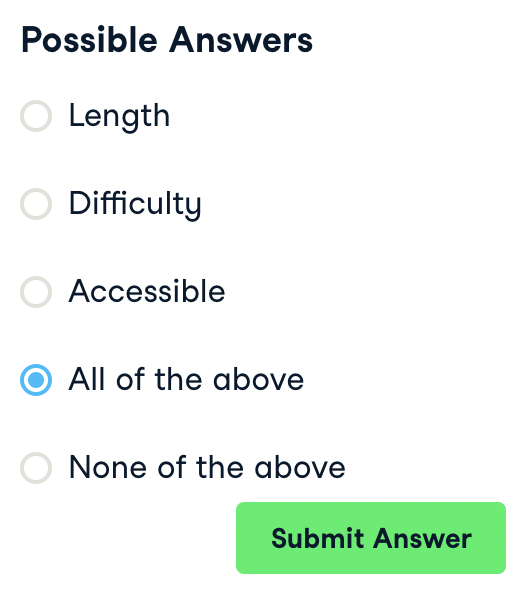

Selecting relevant features

Now let's identify the redundant columns in the volunteer dataset and perform feature selection on the dataset to return a DataFrame of the relevant features.

For example, if you explore the volunteer dataset in the console, you'll see three features which are related to location: locality, region, and postalcode. They contain repeated information, so it would make sense to keep only one of the features.

There are also features that have gone through the feature engineering process: columns like Education and Emergency Preparedness are a product of encoding the categorical variable category_desc, so category_desc itself is redundant now.

Take a moment to examine the features of volunteer in the console, and try to identify the redundant features.

+ Create a list of redundant column names and store it in the to_drop variable:
  + Out of all the location-related features, keep only postcode.
  + Features that have gone through the feature engineering process are redundant as well.
+ Drop the columns from the dataset using .drop().
+ Print out the .head() of the DataFrame to see the selected columns.



In [ ]:
# Create a list of redundant column names to drop
to_drop = ["locality", "region", "category_desc", "vol_requests", "created_date"]

# Drop those columns from the dataset
volunteer_subset = volunteer.drop(to_drop, axis=1)

# Print out the head of the new dataset
print(volunteer_subset.head())

Checking for correlated features

Let's take a look at the wine dataset again, which is made up of continuous, numerical features. Run Pearson's correlation coefficient on the dataset to determine which columns are good candidates for eliminating. Then, remove those columns from the DataFrame.


+ Print out the column correlations of the wine dataset using corr().
+ Take a minute to look at the correlations. Identify a column where the correlation value is greater than 0.75 at least twice and store it in the to_drop variable.
+ Drop that column from the DataFrame using drop().

In [ ]:
# Print out the column correlations of the wine dataset
print(wine.corr())

# Take a minute to find the column where the correlation value is greater than 0.75 at least twice
to_drop = "Flavanoids"

# Drop that column from the DataFrame
wine = wine.drop(to_drop, axis=1)

Exploring text vectors, part 1


Let's expand on the text vector exploration method we just learned about, using the volunteer dataset's title tf/idf vectors. In this first part of text vector exploration, we're going to add to that function we learned about in the slides. We'll return a list of numbers with the function. In the next exercise, we'll write another function to collect the top words across all documents, extract them, and then use that list to filter down our text_tfidf vector.

Instructions

+ Add parameters called original_vocab, for the tfidf_vec.vocabulary_, and top_n.
+ Call pd.Series on the zipped dictionary. This will make it easier to operate on.
+ Use the sort_values function to sort the series and slice the index up to top_n words.
+ Call the function, setting original_vocab=tfidf_vec.vocabulary_, setting vector_index=8 to grab the 9th row, and setting top_n=3, to grab the top 3 weighted words.

In [ ]:
# Add in the rest of the parameters
def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    
    # Let's transform that zipped dict into a series
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    
    # Let's sort the series to pull out the top n weighted words
    zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
    return [original_vocab[i] for i in zipped_index]

# Print out the weighted words
print(return_weights(vocab, tfidf_vec.vocabulary_, text_tfidf, vector_index=8, top_n=3))

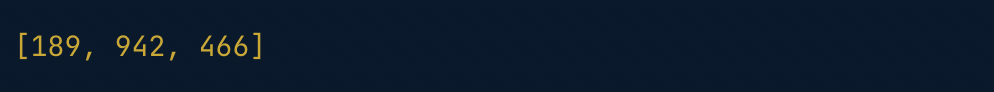

Exploring text vectors, part 2

Using the function we wrote in the previous exercise, we're going to extract the top words from each document in the text vector, return a list of the word indices, and use that list to filter the text vector down to those top words.

Instructions
100 XP
Instructions
100 XP
Call return_weights to return the top weighted words for that document.
Call set on the returned filter_list so we don't get duplicated numbers.
Call words_to_filter, passing in the following parameters: vocab for the vocab parameter, tfidf_vec.vocabulary_ for the original_vocab parameter, text_tfidf for the vector parameter, and 3 to grab the top_n 3 weighted words from each document.
Finally, pass that filtered_words set into a list to use as a filter for the text vector.

In [ ]:
def words_to_filter(vocab, original_vocab, vector, top_n):
    filter_list = []
    for i in range(0, vector.shape[0]):
    
        # Here we'll call the function from the previous exercise, and extend the list we're creating
        filtered = return_weights(vocab, original_vocab, vector, i, top_n)
        filter_list.extend(filtered)
    # Return the list in a set, so we don't get duplicate word indices
    return set(filter_list)

# Call the function to get the list of word indices
filtered_words = words_to_filter(vocab, tfidf_vec.vocabulary_, text_tfidf, 3)

# By converting filtered_words back to a list, we can use it to filter the columns in the text vector
filtered_text = text_tfidf[:, list(filtered_words)]

Training Naive Bayes with feature selection

Let's re-run the Naive Bayes text classification model we ran at the end of chapter 3, with our selection choices from the previous exercise, on the volunteer dataset's title and category_desc columns.

Instructions

Use train_test_split on the filtered_text text vector, the y labels (which is the category_desc labels), and pass the y set to the stratify parameter, since we have an uneven class distribution.
Fit the nb Naive Bayes model to train_X and train_y.
Score the nb model on the test_X and test_y test sets.

In [ ]:
# Split the dataset according to the class distribution of category_desc, using the filtered_text vector
train_X, test_X, train_y, test_y = train_test_split(filtered_text.toarray(), y, stratify=y)

# Fit the model to the training data
nb.fit(train_X,train_y)

# Print out the model's accuracy
print(nb.score(test_X,test_y))


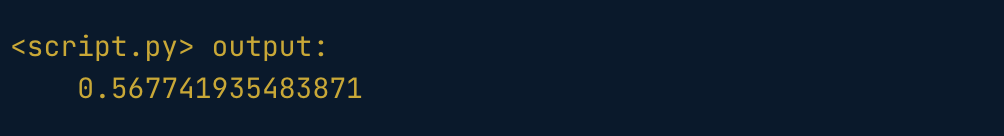

Using PCA

Let's apply PCA to the wine dataset, to see if we can get an increase in our model's accuracy.

Instructions

Set up the PCA object. You'll use PCA on the wine dataset minus its label for Type, stored in the variable wine_X.
Apply PCA to wine_X using pca's fit_transform method and store the transformed vector in transformed_X.
Print out the explained_variance_ratio_ attribute of pca to check how much variance is explained by each component.

In [ ]:
from sklearn.decomposition import PCA

# Set up PCA and the X vector for diminsionality reduction
pca = PCA()
wine_X = wine.drop("Type", axis=1)

# Apply PCA to the wine dataset X vector
transformed_X = pca.fit_transform(wine_X)

# Look at the percentage of variance explained by the different components
print(pca.explained_variance_ratio_)

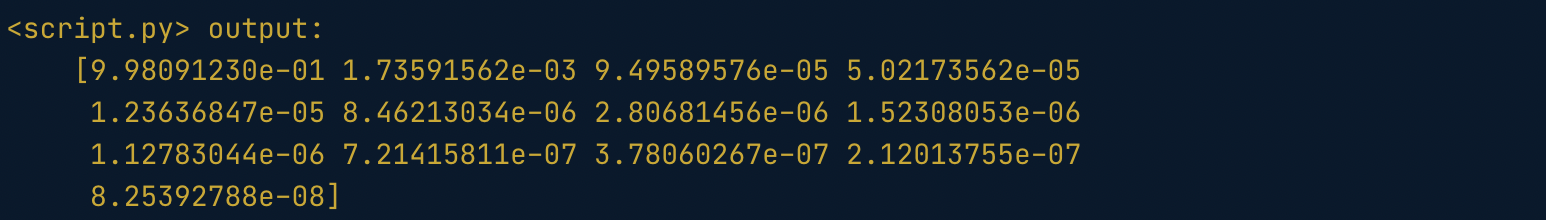

In [ ]:
# Split the transformed X and the y labels into training and test sets
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(transformed_X,y)

# Fit knn to the training data
knn.fit(X_wine_train,y_win_train)

# Score knn on the test data and print it out
print(knn.score(X_wine_test,y_wine_test))

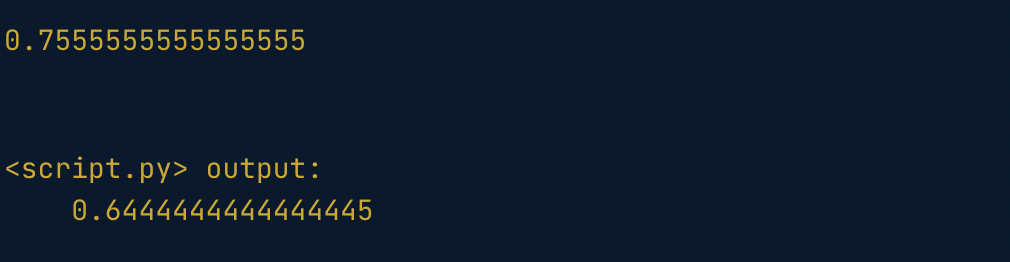